In [1]:
#for easier learning purpose i still write the dependencies
#load the library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
#load the data set, put it in a dataframe 'video_games'
video_games = pd.read_csv('vgsales.csv')
video_games
#the sales number is in millions

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [3]:
# next after we understand the field or the column names of our dataset, we must find the datatypes for each of them
video_games.dtypes

Rank              int64
Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

In [4]:
#check for any null values
video_games.isnull().sum()
#oh bad news, there are some null values in year column and publisher column

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [5]:
#find the total number of missing rows
len(video_games[video_games.isnull().any(axis=1)])

307

In [6]:
#drop the rows that has nan value in year column by only selecting the rows that has no nan value in year column
video_games = video_games[video_games['Year'].notna()]

#Then we fill Nan Values in Publisher column with 'unknown'
video_games = video_games.fillna({'Publisher' : 'unknown'})

#lets check
len(video_games[video_games.isnull().any(axis=1)])
#great no nan 
#len(video_games)
#before we had 16598 rows, now we have 16327, it means we drop 275, good, less than 307

0

In [7]:
#find duplicated rows
#the way i do this is by printing out a data frame consist of duplicated rows, to see what i'm about to drop
#i'm kinf of cautious person, so i tend to do this before removing any duplicate rows

video_games[video_games.duplicated()]

#good. no duplicated rows


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales


In [8]:
video_games.rename(columns={'Year':'Release_year'}, inplace=True)

In [9]:
#now remember that our year column is in float format?, we need to change it into integer
#because there isn't suppose to be decimal place in year is it? 2016 not 2016.0
#the year dtypes is float, lets change it to integer
video_games['Release_year'] = video_games['Release_year'].astype('int')

In [10]:
#Now i want to check distinct values in year column to see the range of the years in dataset
sorted(video_games['Release_year'].unique())

[1980,
 1981,
 1982,
 1983,
 1984,
 1985,
 1986,
 1987,
 1988,
 1989,
 1990,
 1991,
 1992,
 1993,
 1994,
 1995,
 1996,
 1997,
 1998,
 1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017,
 2020]

In [11]:
#dropping the data from 2016 and up
video_games = video_games[video_games['Release_year']<2016]
#the ~ sign is negation, means i'm taking everything but 2016
#sorted(video_games['Year'].unique())
#now, we good to go

In [12]:
#checking the columns' name
list(video_games.columns)

['Rank',
 'Name',
 'Platform',
 'Release_year',
 'Genre',
 'Publisher',
 'NA_Sales',
 'EU_Sales',
 'JP_Sales',
 'Other_Sales',
 'Global_Sales']

1. GROUP BY NAME

In [13]:
#first i'm going to check gta V titles on our video_games dataframe
#note in here, sometimes when we select rows we can use .loc function or we can do it directly by this syntax
#pandas.df[pandas.df['column name'] == 'values name']
#the code above only select rows base on 'values name in 'column name'
#but this is only useful when we know exactly the value name
#imagine we have more that 100.000 of rows, and we dont know exact name of our value
#it's going to take a lot of times to check the value we want to put as select case
#what if we just remember certain word or number from our values
#in our case, i know which value i'm going to select : Grand Theft Auto : V 
#but i dont know how it is written in our dataset
#it could be grand theft auto : 5 in all lower case
#it could be 5 instead V in roman numeral
#in this case we can use string operation,
#string operation is also useful when we perform data cleaning
#regex is also done using string operation function
#so it is good ti practice it as early as possible

#okay now selecting rows base on 'grand' in its name
#in our 'case' parameter i put False so it won't be case sensitive
#so if i put 'grand' as the word parameter it will return 'Grand' or 'GRAND', 'grand'
video_games[video_games['Name'].str.contains('grand',case=False)]
#okay this return everygame that has 'grand' in its name
#we only want to take gta V, and base on this DF we know the 5 is in roman numeral
#do it once again
#we can't put 'And' in our string operation directly but we can use Regular expression
# but in this case i'm just going to put 2 condition on our rows selection
video_games[(video_games['Name'].str.contains('grand',case=False))
           & video_games['Name'].str.contains('V',case=False)]
#this is funny
#turns out there are several games that has grand and V in its name
#but since we know exactly how GTA V written in our dataframe, we will just write in directly
video_games[video_games['Name'] == 'Grand Theft Auto V']

,Rank,Name,Platform,Release_year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
16,17,Grand Theft Auto V,PS3,2013,Action,Take-Two Interactive,7.01,9.27,0.97,4.14,21.40
23,24,Grand Theft Auto V,X360,2013,Action,Take-Two Interactive,9.63,5.31,0.06,1.38,16.38
44,45,Grand Theft Auto V,PS4,2014,Action,Take-Two Interactive,3.80,5.81,0.36,2.02,11.98
197,198,Grand Theft Auto V,XOne,2014,Action,Take-Two Interactive,2.66,2.01,0.00,0.41,5.08
1896,1898,Grand Theft Auto V,PC,2015,Action,Take-Two Interactive,0.36,0.64,0.00,0.08,1.08


In [14]:
total_sales_each_game = video_games.groupby('Name')[['Global_Sales', 'NA_Sales', 'EU_Sales', 
                                                     'JP_Sales', 'Other_Sales']].sum().reset_index()
#and lets find out how many sales  the GTA V made
total_sales_each_game[total_sales_each_game['Name']=='Grand Theft Auto V']
#the total global sales of GTA V is 55.92 Millions
#and North America being the biggest market

,Name,Global_Sales,NA_Sales,EU_Sales,JP_Sales,Other_Sales
3595,Grand Theft Auto V,55.92,23.46,23.04,1.39,8.03


In [15]:
#now i'm going to see which game makes the biggest global sales, is it still related to the rank?
total_sales_each_game.sort_values('Global_Sales', ascending=False).head(10)

,Name,Global_Sales,NA_Sales,EU_Sales,JP_Sales,Other_Sales
10696,Wii Sports,82.74,41.49,29.02,3.77,8.46
3595,Grand Theft Auto V,55.92,23.46,23.04,1.39,8.03
9071,Super Mario Bros.,45.31,32.48,4.88,6.96,0.99
9444,Tetris,35.84,26.17,2.95,6.03,0.69
5414,Mario Kart Wii,35.82,15.85,12.88,3.79,3.31
10698,Wii Sports Resort,33.00,15.75,11.01,3.28,2.96
7146,Pokemon Red/Pokemon Blue,31.37,11.27,8.89,10.22,1.00
1188,Call of Duty: Modern Warfare 3,30.83,15.58,11.29,0.62,3.35
6540,New Super Mario Bros.,30.01,11.38,9.23,6.50,2.90
1184,Call of Duty: Black Ops II,29.72,14.08,11.05,0.72,3.88


In [16]:
#lets see the per released year, which game makes more total sales base on their released year
total_sales_released_year = video_games.groupby(['Release_year', 'Name'])\
[['Global_Sales', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum()\
.sort_values(by=['Release_year', 'Global_Sales'], ascending=[True, False]).reset_index()
#then i'm going to see the top 10 games sales that was released in 2010 
total_sales_released_year[total_sales_released_year['Release_year'] == 2010].head(10)


,Release_year,Name,Global_Sales,NA_Sales,EU_Sales,JP_Sales,Other_Sales
8766,2010,Call of Duty: Black Ops,29.40,17.01,8.69,0.59,3.12
8767,2010,Kinect Adventures!,21.82,14.97,4.94,0.24,1.67
8768,2010,Pokemon Black/Pokemon White,15.32,5.57,3.28,5.65,0.82
8769,2010,Red Dead Redemption,12.94,6.49,4.58,0.26,1.60
8770,2010,FIFA Soccer 11,12.56,1.94,8.01,0.09,2.51
8771,2010,Gran Turismo 5,10.77,2.96,4.88,0.81,2.12
8772,2010,Halo: Reach,9.88,7.03,1.98,0.08,0.78
8773,2010,Zumba Fitness,9.79,5.52,3.33,0.00,0.94
8774,2010,Just Dance 2,9.52,5.84,2.89,0.01,0.78
8775,2010,LEGO Harry Potter: Years 1-4,8.53,4.01,3.50,0.00,1.01


In [17]:
#lets group take top 5 games sales per released year, and find out their publishers
top_5_sales_games_yearly_released = total_sales_released_year[total_sales_released_year['Release_year']==1980].head(5)
#then, do the same for every following year in a loop (1980 not included)
for i in sorted(total_sales_released_year['Release_year'].unique())[1:]:
    a = total_sales_released_year[total_sales_released_year['Release_year']==i].head(5)
    top_5_sales_games_yearly_released = pd.concat([top_5_sales_games_yearly_released, a])
top_5_sales_games_yearly_released[top_5_sales_games_yearly_released['Release_year']==2014]

,Release_year,Name,Global_Sales,NA_Sales,EU_Sales,JP_Sales,Other_Sales
11236,2014,Call of Duty: Advanced Warfare,21.90,10.44,8.18,0.34,2.93
11237,2014,FIFA 15,19.02,3.20,12.40,0.13,3.29
11238,2014,Grand Theft Auto V,17.06,6.46,7.82,0.36,2.43
11239,2014,Minecraft,14.10,5.06,5.93,0.99,2.13
11240,2014,Destiny,12.61,6.59,4.12,0.28,1.62


In [18]:
#find which one is the most popular publishers
#based on top 5 yearly released games, which publisher has more of its game in the top 5 sales yearly

#first we create a new dataframe base on top_5_sales_games_yearly_released dataframe
top_5_sales_games_yearly_released_all_rows = video_games[video_games['Name'].isin(
    top_5_sales_games_yearly_released['Name'].unique())]

#the group them by their publisher and count how many games by each publisher released
top_publishers_top_games = top_5_sales_games_yearly_released_all_rows.groupby(['Publisher'])[['Name']].count().\
sort_values('Name', ascending= False)
top_publishers_top_games

,Name
Publisher,
Electronic Arts,93
Nintendo,92
Activision,66
Take-Two Interactive,23
Sony Computer Entertainment,14
Atari,12
LucasArts,10
Ubisoft,7
SquareSoft,7


2. GROUP BY PLATFORM

Now we are going to do some aggregates base on  platform. first we need to check the platforms that are listed in our dataset

In [19]:
#check the distinct value of platform types
platform_list = video_games['Platform'].unique()
platform_list

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       '3DS', 'PS4', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne', 'GC',
       'WiiU', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [20]:
#Find out the total Games released per platform
#Remember, there are duplicates value in 'Name' column because some games released in multiplatform
#since we want to 'count' how many titles, we are going to drop duplicates first
#each game should be counted 1 regardles how many platform it was released in
total_games_platform = video_games.drop_duplicates(subset='Name', keep='first')\
.groupby('Platform')[['Name']].count().sort_values('Name', ascending=False)
total_games_platform.head(10)

,Name
Platform,
PS2,1833
DS,1785
PS,1117
Wii,928
PSP,900
PS3,692
GBA,613
X360,547
PC,486


In [21]:
# group by platform and release year, to see how many games released on each platform on yearly basis
#we dont drop duplicates name here because we want to count per platform
platform_year_released = video_games.groupby(['Platform', 'Release_year'])\
[['Name']].count().sort_values(by=['Platform', 'Name'], ascending=[True, False])

#Lets see PS2 
platform_year_released.loc['PS2']

#2002 is the best year for ps2, there are 280 games released in ps2
#2011 is the last year for ps2 to ever get games released in the platform (7 games only)
#good long 12 years

,Name
Release_year,
2002,280
2005,260
2004,259
2006,259
2003,256
2007,214
2008,191
2001,185
2009,96


In [22]:
#Now lets group by platform and genres
#we want to see which genre is released more on each console 
platform_genres = video_games.groupby(['Platform', 'Genre'])[['Name']].count()\
.sort_values(by=['Platform', 'Name'], ascending=[True, False])

#lets see ps3 and xbox one
platform_genres.loc[['PS4', 'XOne']]

Name
Platform Genre             
PS4      Action          85
         Role-Playing    33
         Sports          30
         Shooter         21
         Adventure       14
         Fighting        11
         Misc            10
         Racing          10
         Platform         7
         Strategy         4
         Simulation       2
         Puzzle           1
XOne     Action          51
         Sports          27
         Shooter         23
         Misc            15
         Adventure       11
         Racing          11
         Role-Playing    10
         Fighting         5
         Platform         2
         Simulation       2
         Strategy         2

In [23]:
#now lets group by platform and publisher, how many games has each publishers released on each platform
platform_publisher= video_games.groupby(['Platform', 'Publisher'])[['Name']].count()\
.sort_values(by=['Platform', 'Name'], ascending=[True, False])

#lets see ps3 and xbox one
platform_publisher.loc['PS4'].head(5)
#we can see that EA release more games in ps4 compare to other publisher
#does ps4 is the platform where EA release most of its game?
#we will find the answer later when we group them by publisher and platform
#right now we just find the relations between platform and publishers
#we still have to visualize this later

,Name
Publisher,
Electronic Arts,20
Ubisoft,19
Activision,17
Namco Bandai Games,16
Tecmo Koei,16


In [24]:
#okay lets see the total sales for each platform 
platform_sales= video_games.groupby(['Platform'])\
[['Global_Sales', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum()\
.sort_values(by=['Global_Sales'], ascending=False).reset_index()

#lets see ps3 and xbox one
platform_sales.head(10)
#hmm ps2 is on top of the chart 
#wee need to visualize this later

,Platform,Global_Sales,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,PS2,1233.46,572.92,332.63,137.54,190.47
1,X360,968.78,593.97,277.61,12.30,84.60
2,PS3,946.76,388.50,339.67,78.08,140.59
3,Wii,909.81,497.37,264.35,68.28,79.20
4,DS,818.67,388.29,194.07,175.02,60.27
5,PS,727.39,334.71,212.38,139.78,40.69
6,GBA,313.56,184.12,74.59,46.56,7.61
7,PSP,291.71,107.09,67.16,75.89,41.52
8,GB,254.42,113.64,47.51,85.12,8.16
9,PC,252.45,91.26,136.05,0.17,24.16


In [25]:
#well ps2 has the most sales because it was the longest platform ever maintain (11 years)
#and there are 1883 games released in this platform
#lets find the average sale
platform_sales_mean= video_games.groupby(['Platform'])\
[['Global_Sales', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].mean()\
.sort_values(by=['Global_Sales'], ascending=False).reset_index()


platform_sales_mean.head(10)
#we can see here ps4 is actually made a better average sale than ps2

,Platform,Global_Sales,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,GB,2.622887,1.171546,0.489794,0.877526,0.084124
1,NES,2.561939,1.285102,0.215816,1.006633,0.054184
2,GEN,1.050370,0.713704,0.204444,0.098889,0.032963
3,PS4,1.047456,0.372544,0.465877,0.044035,0.165044
4,SNES,0.837029,0.256192,0.079665,0.487657,0.013473
5,XOne,0.809371,0.481132,0.257987,0.002075,0.068365
6,X360,0.789552,0.484083,0.226251,0.010024,0.068949
7,2600,0.746293,0.696379,0.041897,0.000000,0.007241
8,PS3,0.744308,0.305425,0.267036,0.061384,0.110527
9,Wii,0.705279,0.385558,0.204922,0.052930,0.061395


In [26]:
#lets check the platform and genre total sales
game_platform_genre = video_games.groupby(['Platform', 'Genre'])[['Global_Sales']].sum().sort_values(by=['Platform', 'Global_Sales'], 
                                                                                                    ascending=[True, False])
game_platform_genre.loc[['PS4','XOne']]

Global_Sales
Platform Genre                     
PS4      Action               78.90
         Shooter              63.01
         Sports               40.67
         Role-Playing         22.16
         Racing               10.68
         Misc                  7.18
         Fighting              5.70
         Platform              5.40
         Adventure             4.08
         Simulation            0.65
         Strategy              0.37
         Puzzle                0.02
XOne     Shooter              47.21
         Action               31.39
         Sports               20.23
         Role-Playing          8.96
         Racing                8.11
         Misc                  6.86
         Adventure             2.40
         Fighting              1.99
         Platform              0.65
         Simulation            0.53
         Strategy              0.36

In [27]:
#lets do the same thing but platform and publishers, lets see the sales of each publisher per platform
game_platform_genre = video_games.groupby(['Platform', 'Publisher'])[['Global_Sales']].sum().sort_values(by=['Platform', 'Global_Sales'], 
                                                                                                    ascending=[True, False])
game_platform_genre.loc['PS4'].head()
#we can see here, EA made more sales than any other publishers in ps4

,Global_Sales
Publisher,
Electronic Arts,47.46
Activision,38.37
Ubisoft,25.47
Sony Computer Entertainment,24.31
Take-Two Interactive,23.66


3. Group By year

In [28]:
year_total = video_games.drop_duplicates(subset='Name', keep='first')\
.groupby(['Release_year'])[['Name']].count()\
.sort_values(by=['Name'], ascending=False)


year_total.head(5)
# we can see here 2008 is the year where we have more total games released compare to any other year
#we also need to visualize this later

,Name
Release_year,
2008,989
2009,960
2010,863
2007,839
2011,751


In [29]:
#now lets see year and genre. i want to see in 2009, which genre is popular during that time
year_genre = video_games.drop_duplicates(subset='Name', keep='first')\
.groupby(['Release_year', 'Genre'])[['Name']].count()\
.sort_values(by=['Release_year', 'Name'], ascending=[True, False])

#lets see 2009
year_genre.loc[2009]
#in 2009, there are more misc games compare to other
#we need to take top 3 each year and visualize it later

,Name
Genre,
Misc,143
Action,135
Adventure,117
Sports,107
Simulation,101
Role-Playing,87
Puzzle,68
Shooter,54
Strategy,54


In [30]:
#now lets see year and publisher. i want to see in 2009, which publisher release more games during this time
year_publisher = video_games.drop_duplicates(subset='Name', keep='first')\
.groupby(['Release_year', 'Publisher'])[['Name']].count()\
.sort_values(by=['Release_year', 'Name'], ascending=[True, False])

#lets see 2009
year_publisher.loc[2009].head(10)
#in 2009, Ubisoft release more games than EA
#same as before, we might want to take top 3 each year when we visualize it later

,Name
Publisher,
Ubisoft,73
Namco Bandai Games,55
Electronic Arts,51
Konami Digital Entertainment,43
Activision,40
Sony Computer Entertainment,34
Nintendo,31
THQ,31
Sega,29


In [31]:
#last lets see the total sales global and regional, base on release_year
#later we might want to see in visualization, does year such as 2009 who has more game released
#also has better total sales compare to other year
year_sales= video_games.groupby(['Release_year'])\
[['Global_Sales', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum()\
.sort_values(by=['Global_Sales'], ascending=False).reset_index()

year_sales.head(10)

#we can see here, 2008 has better sales than 2009, eventhough there are more games released in 2009
#we can also see 2007 has more sales, eventhough there are more games released in 2010
#we need to visualize this later

,Release_year,Global_Sales,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,2008,678.90,351.44,184.40,60.26,82.39
1,2009,667.30,338.85,191.59,61.89,74.77
2,2007,611.13,312.05,160.50,60.29,77.60
3,2010,600.45,304.24,176.73,59.49,59.90
4,2006,521.04,263.12,129.24,73.73,54.43
5,2011,515.99,241.06,167.44,53.04,54.39
6,2005,459.94,242.61,121.94,54.28,40.58
7,2004,419.31,222.59,107.32,41.65,47.29
8,2002,395.52,216.19,109.74,41.76,27.28
9,2013,368.11,154.77,125.80,47.59,39.82


4. GROUP BY GENRES

In [32]:
#lets find out how many dictinct genres are there
genres = sorted(video_games['Genre'].unique())
genres
#there are 12 genres

['Action',
 'Adventure',
 'Fighting',
 'Misc',
 'Platform',
 'Puzzle',
 'Racing',
 'Role-Playing',
 'Shooter',
 'Simulation',
 'Sports',
 'Strategy']

In [33]:
#Total games released per Genre
#because we want to count per genre, we should drop any duplicated games name because they are multiplatform
total_genre_released = video_games.drop_duplicates(subset='Name', keep='first')\
.groupby('Genre')[['Name']].count().sort_values('Name', ascending=False)
total_genre_released
#we can see here, up to 2015, there are more action genre than any other genre

,Name
Genre,
Action,1830
Sports,1351
Misc,1304
Role-Playing,1182
Adventure,1015
Shooter,792
Racing,753
Simulation,704
Fighting,596


In [34]:
#genre per released year
#how many total games released per genre per released year?
#we already do this in release year and genre group by
#but since we put genre first, the result will be easier to see at what year for each genre has the most released
#still drop duplicates
total_genre_released_year = video_games.drop_duplicates(subset='Name', keep='first')\
.groupby(['Genre', 'Release_year'])[['Name']].count()\
.sort_values(by=['Genre', 'Name'], ascending=[True, False]).reset_index()

#i want to see the action genre, at which year action genre get the most game released?
total_genre_released_year[total_genre_released_year['Genre']=='Action'].head(5)
#as we can see here, 2010 has the most action genre released followed by 2012 and 2015

#lets put top 3 released year in its own dataframe
top_genre_year = total_genre_released_year[total_genre_released_year['Genre']=='Action'].head(3)

for i in range(1, len(genres)):
    top_genre_year = pd.concat([top_genre_year, total_genre_released_year[total_genre_released_year['Genre']==genres[i]].head(3)])
    
top_genre_year.reset_index(drop=True)

#we can see here the best year for action genre is 2009, for adventure its 2008

#we need to visualize this later

,Genre,Release_year,Name
0,Action,2012,172
1,Action,2015,138
2,Action,2009,135
3,Adventure,2008,145
4,Adventure,2010,137
5,Adventure,2009,117
6,Fighting,2006,46
7,Fighting,2007,40
8,Fighting,2008,40
9,Misc,2008,153


In [35]:
#Total sales per genre , both by global and regional
genre_sales = video_games.groupby('Genre')[['Global_Sales', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum()\
.sort_values(by=['Global_Sales'], ascending=False)
genre_sales #return pandas dataframe


,Global_Sales,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Genre,,,,,
Action,1702.96,855.93,510.12,152.86,183.09
Sports,1294.64,665.52,363.98,133.98,130.73
Shooter,1007.98,567.72,302.75,37.57,99.48
Role-Playing,917.04,325.11,186.29,346.62,58.94
Platform,827.08,445.20,199.80,130.54,51.20
Misc,796.45,402.26,213.73,105.86,73.99
Racing,725.13,356.60,235.18,56.60,76.49
Fighting,440.19,219.14,98.85,86.51,35.73
Simulation,389.48,181.51,113.11,63.24,31.34


In [36]:
#but talking about sales, it will be weird if we dont try to find its average as well
#this way we can see the average sale not biased by the numbers of game
#is action still the best selling genre over the year, if we take the average
genre_sales_mean = video_games.groupby('Genre')[['Global_Sales', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].mean()\
.sort_values(by=['Global_Sales'], ascending=False)
genre_sales_mean #return pandas dataframe

,Global_Sales,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Genre,,,,,
Platform,0.955058,0.514088,0.230716,0.150739,0.059122
Shooter,0.806384,0.454176,0.242200,0.030056,0.079584
Role-Playing,0.641735,0.227509,0.130364,0.242561,0.041246
Racing,0.601269,0.295688,0.195008,0.046932,0.063425
Sports,0.571333,0.293698,0.160627,0.059126,0.057692
Action,0.543556,0.273198,0.162822,0.048790,0.058439
Fighting,0.535511,0.266594,0.120255,0.105243,0.043467
Misc,0.470715,0.237742,0.126318,0.062565,0.043729
Simulation,0.463115,0.215826,0.134495,0.075196,0.037265


In [37]:
#lets compare the sales of genre by game release year
#think of it this way, at which year action shooter genre made most of its total sales
genre_year_sales = video_games.groupby(['Genre', 'Release_year'])\
[['Global_Sales', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum()\
.sort_values(['Genre', 'Global_Sales'], ascending=[True, False])#.reset_index()
genre_year_sales.loc['Shooter'].head(5)
#we can see here, shooter genre make more sales in 2011 followed by 2010 and 2012
#this has nothing to do with total shooter genre released
#because base on the previous query, shooter genre has most game released in 2005, 2011, and 2009
# we might want to visualize this later in the bar chart comparing each each release year for sales vs total game released

,Global_Sales,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Release_year,,,,,
2011,99.36,49.82,35.31,2.69,11.53
2010,77.41,43.10,23.90,2.12,8.32
2012,72.86,35.06,26.34,2.62,8.82
2007,71.04,38.88,22.09,1.53,8.49
2009,69.89,38.99,21.17,1.12,8.56


In [38]:
#now lets see their average per games' released year
genre_year_sales = video_games.groupby(['Genre', 'Release_year'])\
[['Global_Sales', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].mean()\
.sort_values(['Genre', 'Global_Sales'], ascending=[True, False])#.reset_index()
genre_year_sales.loc['Shooter']

,Global_Sales,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Release_year,,,,,
1984,10.366667,9.263333,0.283333,0.653333,0.166667
1980,3.535000,3.280000,0.215000,0.000000,0.040000
2015,1.945588,0.905588,0.712647,0.079118,0.247353
1993,1.540000,0.805000,0.255000,0.445000,0.035000
2012,1.517917,0.730417,0.548750,0.054583,0.183750
2014,1.404255,0.653617,0.549149,0.022979,0.178298
1989,1.200000,0.400000,0.390000,0.360000,0.040000
2013,1.064407,0.520339,0.392373,0.029322,0.121186
2011,1.057021,0.530000,0.375638,0.028617,0.122660


5. GROUP BY PUBLISHERS

In [39]:
#lets check the distinct publisher
publishers = video_games['Publisher'].nunique()
publishers
#there are 565 total publishers
#some of the publishers may not exist anymore by the time this data set is scrapped in 2016
#for example lucas art (bought by disney), atari, Squaresoft (becomes square enix)

565

In [40]:
#total games released per publishers
#drop the duplicated title for multiplatform game
total_games_publishers= video_games.drop_duplicates(subset='Name', keep='first')\
.groupby('Publisher')[['Name']].count().sort_values('Name', ascending=False).reset_index()
total_games_publishers.head(10)
#wow namco bandai games actually released more games than nintendo or EA
#we need to visualize this later 

,Publisher,Name
0,Namco Bandai Games,731
1,Nintendo,648
2,Konami Digital Entertainment,628
3,Sony Computer Entertainment,608
4,Electronic Arts,590
5,Ubisoft,554
6,Sega,460
7,THQ,391
8,Activision,388
9,Atari,261


In [41]:
#total games per released year for publishers
#drop the duplicated value in name column, only count per game title regardles of multiplatform 
total_games_publishers_released_year= video_games.drop_duplicates(subset='Name', keep='first')\
.groupby(['Publisher', 'Release_year'])[['Name']].count()\
.sort_values(by=['Publisher', 'Name'], ascending=[True, False])#.reset_index()
total_games_publishers_released_year.loc['Nintendo'].head(10)
#interesting, nintendo released more games in 2004 compare to other years
#what about Electronic Arts?
total_games_publishers_released_year.loc['Electronic Arts'].head(10)
#EA released more games in 2008

,Name
Release_year,
2008,56
2009,51
2005,48
2002,41
2006,41
2007,40
2003,32
2004,32
2010,32


In [94]:
#lets check the total sales
sales_publisher = video_games.groupby('Publisher')[['Global_Sales', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum().\
sort_values(by=['Global_Sales'], ascending=False).reset_index()
sales_publisher
#nintendo makes more sales than EA or activision
#this makes sense because nintendo maade more game than ea or activision
#but EA and Activision made more sales compare to sony, eventhough sont released more games

,Publisher,Global_Sales,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Nintendo,1780.96,814.59,417.37,453.82,94.99
1,Electronic Arts,1081.14,580.58,360.47,13.89,126.00
2,Activision,717.74,424.34,212.33,6.40,74.35
3,Sony Computer Entertainment,600.72,262.79,184.68,73.88,79.35
4,Ubisoft,463.49,248.69,158.65,7.09,48.86
...,...,...,...,...,...,...
560,Naxat Soft,0.01,0.00,0.00,0.01,0.00
561,Boost On,0.01,0.00,0.00,0.01,0.00
562,Otomate,0.01,0.00,0.00,0.01,0.00
563,New World Computing,0.01,0.01,0.00,0.00,0.00


In [43]:
#nintendo made the most sales over the year
#how about we see the average to see which plublisher made better average sale
#because nintendo released more games than activision, of course it made better sale
#now we see the average to cop with the total games released
sales_publisher_mean = video_games.groupby('Publisher')[['Global_Sales']].mean().\
sort_values(by=['Global_Sales'], ascending=False).reset_index()
sales_publisher_mean[sales_publisher_mean['Publisher']=='Activision']
#okay hmm activision fell to rank 32
#but i think we should not take the averagesale in here, because smaller company with less game released
#might have higher rank with less sales 

,Publisher,Global_Sales
32,Activision,0.753929


In [44]:
#Total sales base on games release year
yearly_sales_publisher = video_games.groupby(['Publisher', 'Release_year'])[['Global_Sales']].sum().\
sort_values(by=['Publisher', 'Global_Sales'], ascending=[True, False]).reset_index()
yearly_sales_publisher[yearly_sales_publisher['Publisher']=='Activision']
#hmm Activision made more sales in 2009

#what about EA?
yearly_sales_publisher[yearly_sales_publisher['Publisher']=='Electronic Arts']
#also 2009

,Publisher,Release_year,Global_Sales
626,Electronic Arts,2009,86.20
627,Electronic Arts,2008,84.12
628,Electronic Arts,2010,81.38
629,Electronic Arts,2002,73.01
630,Electronic Arts,2011,72.25
631,Electronic Arts,2007,71.33
632,Electronic Arts,2003,69.83
633,Electronic Arts,2004,67.33
634,Electronic Arts,2005,67.01
635,Electronic Arts,2006,58.41


In [45]:
#how about the average per yearly basis for each publishers?
yearly_sales_publisher_mean = video_games.groupby(['Publisher', 'Release_year'])[['Global_Sales']].mean().\
sort_values(by=['Publisher', 'Global_Sales'], ascending=[True, False]).reset_index()
yearly_sales_publisher[yearly_sales_publisher['Publisher']=='Activision']
#hmm Activision made more sales in 2009

#what about EA?
yearly_sales_publisher_mean[yearly_sales_publisher_mean['Publisher']=='Electronic Arts']
#wow turns out 2015 is the better average sales than 2009 
#2009 has better total sales because EA released more games in 2009 than 2015

,Publisher,Release_year,Global_Sales
626,Electronic Arts,2015,1.419375
627,Electronic Arts,2014,1.300000
628,Electronic Arts,2013,1.260000
629,Electronic Arts,2012,1.084783
630,Electronic Arts,2001,1.049302
631,Electronic Arts,1998,0.998333
632,Electronic Arts,2011,0.950658
633,Electronic Arts,2010,0.924773
634,Electronic Arts,1997,0.917600
635,Electronic Arts,2002,0.829659


In [46]:
#lets see publishers and genre
#which genre is more favorable to top publishers such as nintendo, EA or activision?
publishers_genres = video_games.drop_duplicates(subset='Name', keep='first')\
.groupby(['Publisher', 'Genre'])[['Name']].count()\
.sort_values(by=['Publisher', 'Name'], ascending=[True, False])

#lets check EA
publishers_genres.loc['Electronic Arts']
#over the years EA released sports game more than any other genre, followed by simulation, racing, and shooter

#what about activision?
publishers_genres.loc['Activision']
#activision release action genre more than any other genre, followe by shooter, sports, and Misc

#we need to visualize this later
#probably by taking top 10 publishers base on their total sales over the years

,Name
Genre,
Action,105
Shooter,59
Sports,55
Misc,43
Racing,28
Platform,21
Role-Playing,21
Simulation,20
Strategy,13


In [47]:
#how much sales by genre each publishers made? is it according to the number of games per genre released?
#we dont drop duplicates here because we are taking the sales sum
publishers_genres_sales = video_games.groupby(['Publisher', 'Genre'])[['Global_Sales']].sum()\
.sort_values(by=['Publisher', 'Global_Sales'], ascending=[True, False])

#lets check EA
publishers_genres_sales.loc['Electronic Arts']
#Ea made more sales in sports genre (well EA also released more games in sports genre, so this is logical)
#but number 2 and 3 are shooter and racing, the numer 3 and 4 in total games per genre released
#beter than simulation sales

#what about activision?
publishers_genres_sales.loc['Activision']
#wow, total sales from shooter genre is more than double of action genre
#eventhough action genre has 105 total games released, and shooter only 59

#we need to visualize the total games vs total sales per genre for each publishers

,Global_Sales
Genre,
Shooter,292.25
Action,141.59
Misc,76.55
Sports,75.16
Role-Playing,46.50
Platform,33.40
Strategy,17.70
Racing,16.99
Simulation,8.26


In [48]:
#lets see publishers and Platform
#which platform is more favorable to each publishers
publisher_platform  = video_games.drop_duplicates(subset='Name', keep='first')\
.groupby(['Publisher', 'Platform'])[['Name']].count()\
.sort_values(by=['Publisher', 'Name'], ascending=[True, False])

#lets check EA
publisher_platform.loc['Electronic Arts']
#over the years EA released their games more on ps3 than xbox 360

#what about activision?
publisher_platform.loc['Activision']
#Activision actually release their games more on x360 than ps3

#what about nintendo?
publisher_platform.loc['Nintendo']
#oh this is definitely good findings, since the very first game they made, NIntendo nevery goes multiplatform!
#they only exclusively released their games on their own 'owned' console!
#i their CEO in 2018 stated that they are never going to release nintendo game on multiple platform
#because if they do this, it's game over for them
#the article : https://nintendosoup.com/nintendo-we-will-absolutely-never-release-nintendo-games-on-other-consoles/
#i think this requires further analysis with different dataset
#the question is what happen will happen exactly if they choose to go multiplatform?
#will they able to increase their videogames sales in the cost of the platform sales?

,Name
Platform,
DS,148
GBA,85
Wii,77
3DS,71
N64,58
GB,52
GC,51
NES,41
SNES,34


In [49]:
#publishers per platform total sales?
publishers_platform_sales = video_games.groupby(['Publisher', 'Platform'])[['Global_Sales']].sum()\
.sort_values(by=['Publisher', 'Global_Sales'], ascending=[True, False])

#lets check EA
publishers_platform_sales.loc['Electronic Arts']
#wow this is an interesting findngs, eventhough EA released their games more ps3, but they made more sales on xbox 360 

#what about activision?
publishers_platform_sales.loc['Activision']
#hmm activision made more money from x360 (they also released more games in x360)

,Global_Sales
Platform,
X360,158.70
PS3,126.32
PS2,85.59
Wii,60.06
PC,45.23
DS,41.81
PS4,38.37
XB,32.48
PS,30.05


In [50]:
#lets find out the maximum sales per game released year
publisher_max_sales = video_games.groupby(['Publisher', 'Release_year'])[['Global_Sales']].max()\
.sort_values(by=['Publisher', 'Global_Sales'], ascending=[True, False])

#whats EA max sales per released year?
ea_top_sales = publisher_max_sales.loc['Electronic Arts']

#lets make the dataframe for EA
EA_top_sales_yearly = video_games[(video_games['Publisher']=='Electronic Arts') & 
                                  (video_games['Global_Sales'].isin(ea_top_sales['Global_Sales']))]


#there is still duplicate values
#lets sort by year, and drop duplicates year, and keeping the first appeareance
EA_top_sales_yearly = EA_top_sales_yearly.sort_values(by='Release_year', ascending=True).reset_index(drop=True)
#then drop duplicates and keep the first value
EA_top_sales_yearly = EA_top_sales_yearly.drop_duplicates(subset='Release_year', keep='first').reset_index(drop=True)
EA_top_sales_yearly
#here we can see per release year, which game has the most sales
#we can visualize this later

,Rank,Name,Platform,Release_year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,12528,Syndicate,PC,1992,Strategy,Electronic Arts,0.00,0.05,0.00,0.01,0.06
1,3507,Theme Park,PS,1994,Simulation,Electronic Arts,0.24,0.16,0.13,0.04,0.57
2,1556,Road Rash,PS,1995,Racing,Electronic Arts,0.71,0.48,0.00,0.08,1.27
3,1234,NASCAR 98,PS,1996,Racing,Electronic Arts,1.43,0.05,0.00,0.04,1.52
4,649,Theme Hospital,PC,1997,Strategy,Electronic Arts,2.30,0.10,0.00,0.00,2.40
5,443,Need for Speed III: Hot Pursuit,PS,1998,Racing,Electronic Arts,2.14,0.86,0.00,0.13,3.12
6,421,007: Tomorrow Never Dies,PS,1999,Shooter,Electronic Arts,1.72,1.33,0.00,0.16,3.21
7,474,The Sims: Livin Large,PC,2000,Misc,Electronic Arts,1.67,1.18,0.00,0.13,2.99
8,331,Harry Potter and the Sorcerer's Stone,PS,2001,Action,Electronic Arts,1.37,2.00,0.14,0.22,3.73
9,12269,Pirates: The Legend of Black Kat,XB,2002,Adventure,Electronic Arts,0.05,0.01,0.00,0.00,0.06


6. Brief statistic

In [51]:
#lets find the percentage of games sales and count per publisher and per genre
#think of it this way
#out of all games released so far what is the % of publisher?, what % of genre?
#and per yearly how many % publisher per game released year
##and do the same but instead of count, it is the sales number
des = video_games[['Publisher', 'Global_Sales']]
EA = video_games[video_games['Publisher']=='Electronic Arts'][['Name','Global_Sales']].describe()
EA

,Global_Sales
count,1319.000000
mean,0.819666
std,1.057866
min,0.010000
25%,0.200000
50%,0.480000
75%,1.010000
max,8.490000


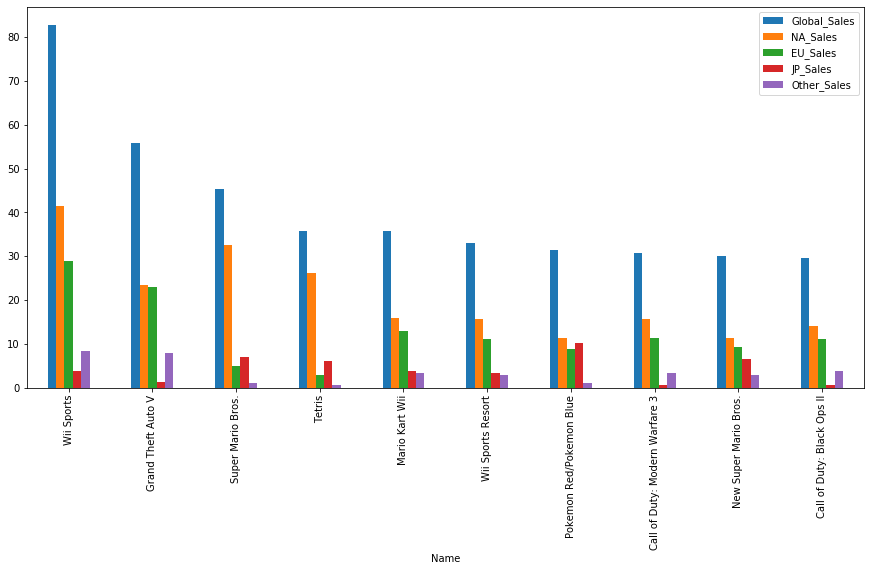

In [70]:
#Visualize the top 10 total sales per game title 
total_sales_each_game.sort_values('Global_Sales', ascending=False).head(10).set_index('Name').plot.bar(figsize=(15, 7))
plt.savefig('Total_sales.png', bbox_inches = 'tight')
plt.show()

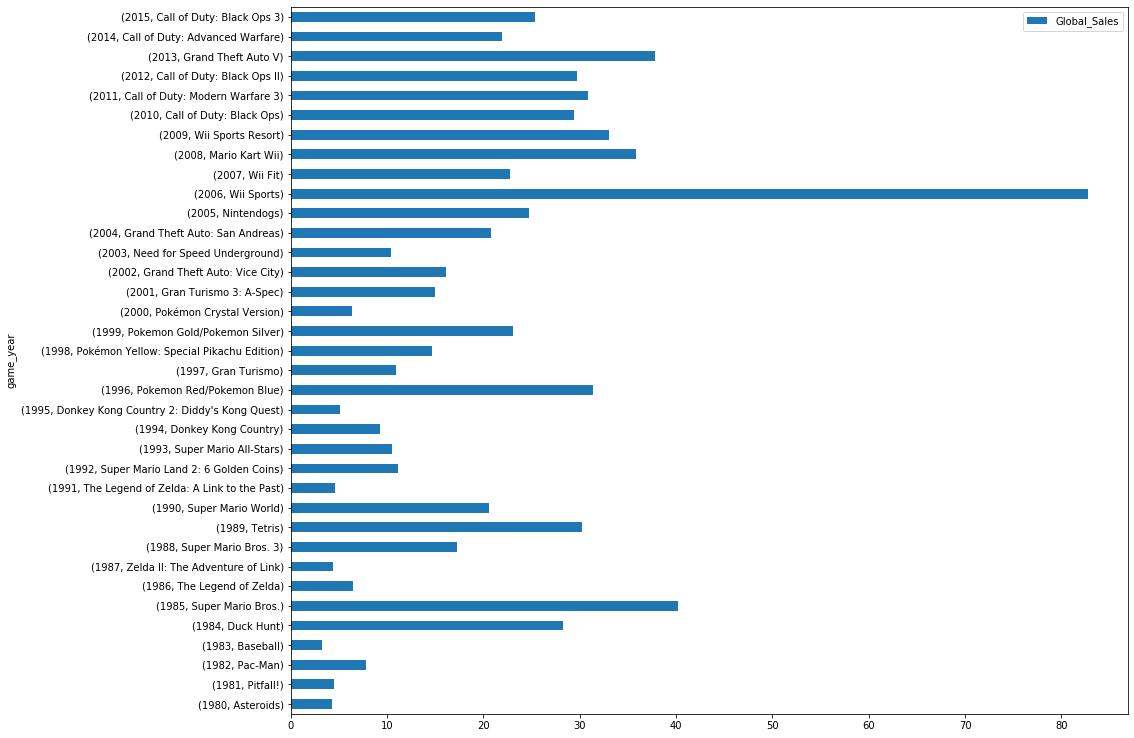

In [80]:
#now lets see per released year, which game has the most sales

#make the data
top_sales_games_yearly_released = total_sales_released_year[total_sales_released_year['Release_year']==1980].head(1)
#then, do the same for every following year in a loop (1980 not included)
for i in sorted(total_sales_released_year['Release_year'].unique())[1:]:
    a = total_sales_released_year[total_sales_released_year['Release_year']==i].head(1)
    top_sales_games_yearly_released = pd.concat([top_sales_games_yearly_released, a])

#create a new tuple column for our x axis 
top_sales_games_yearly_released['game_year'] = top_sales_games_yearly_released[['Release_year', 'Name']].apply(tuple, axis=1)

#now barplot    
top_sales_games_yearly_released.plot.barh(figsize=(15, 13), x='game_year', y='Global_Sales')
plt.savefig('Total_sales_per_released_year.png', bbox_inches = 'tight')
plt.show()

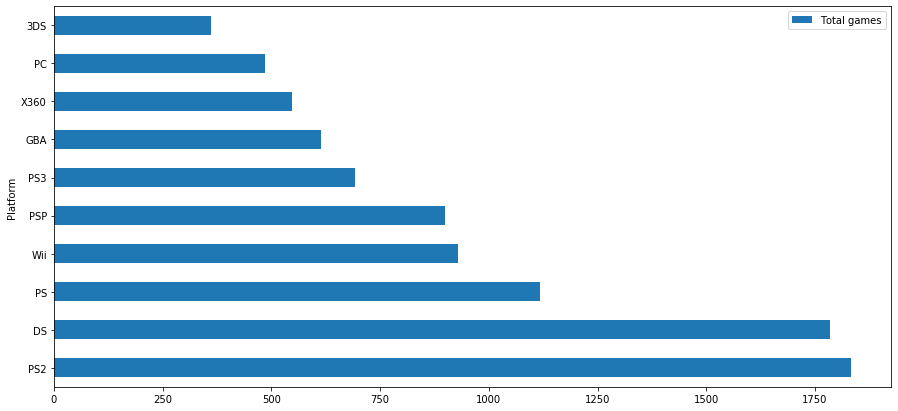

In [77]:
#now lets see how many games has been release per platform
total_games_platform.head(10).plot.barh(figsize=(15,7))
plt.savefig('Total_sales_platform.png', bbox_inches = 'tight')
plt.legend(['Total games'])
plt.show()

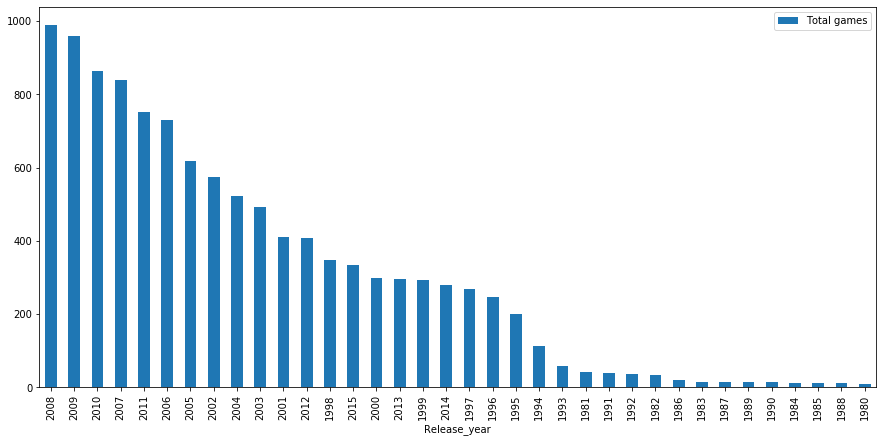

In [76]:
#lets see how many games released per year
year_total.plot.bar(figsize=(15,7))
plt.savefig('Total_games_yearly.png', bbox_inches = 'tight')
plt.legend(['Total games'])
plt.show()

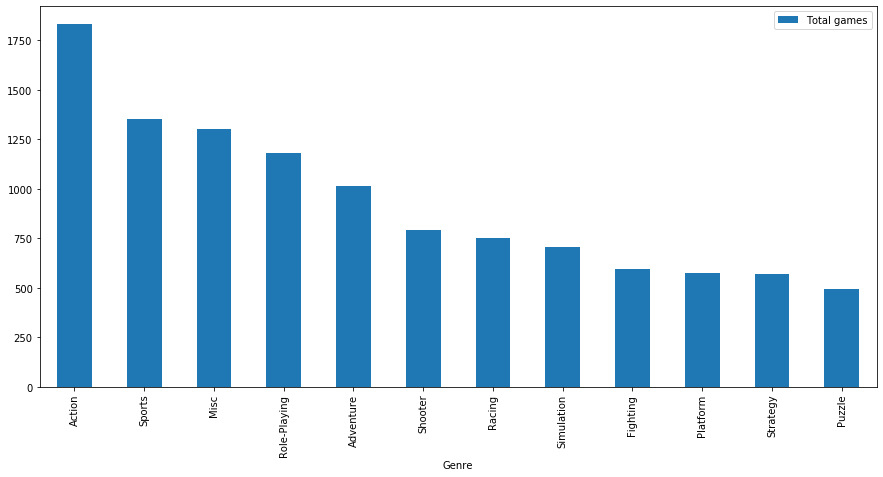

In [78]:
#now we move to genre
#first find the total games per genres released
#we already drop the duplicate values for games that released on multiple platform
#so same game title is only counted one
total_genre_released.plot.bar(figsize=(15,7))
plt.savefig('Total_genres.png', bbox_inches = 'tight')
plt.legend(['Total games'])
plt.show()

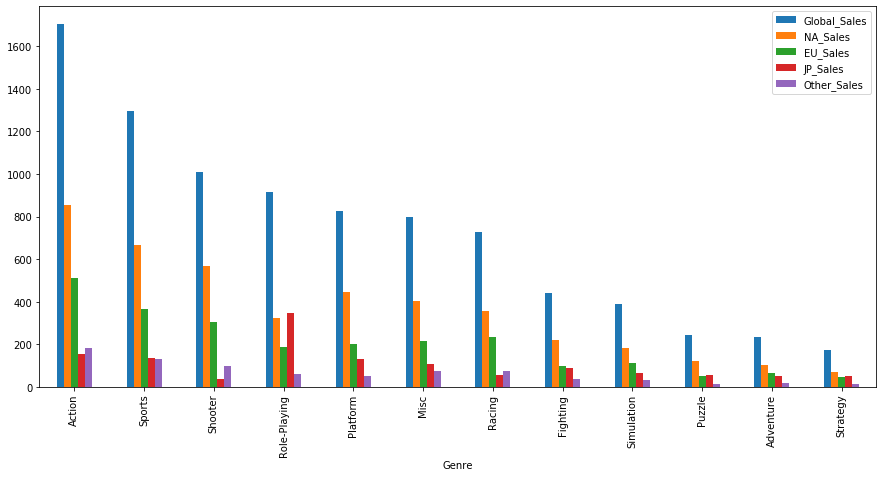

In [79]:
#lets check total sales per genre
genre_sales.plot.bar(figsize=(15,7))
plt.savefig('Total_genres_sales.png', bbox_inches = 'tight')
plt.show()

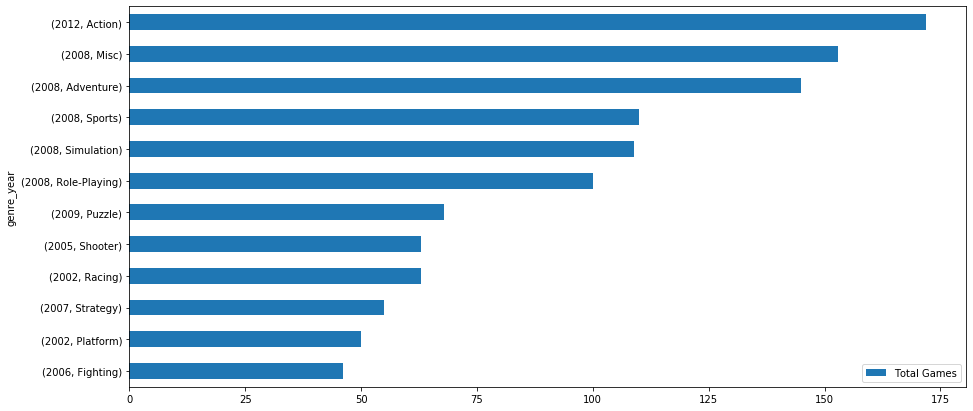

In [91]:
#now last for genre, lets find out per games' released year, which genre is the most dominant
#lets put ranked 1 per released year per genre in its own dataframe
top_genre_year = total_genre_released_year[total_genre_released_year['Genre']=='Action'].head(1)

for i in range(1, len(genres)):
    top_genre_year = pd.concat([top_genre_year, total_genre_released_year[total_genre_released_year['Genre']==genres[i]].head(1)])
    
top_genre_year.reset_index(drop=True)

#create a new tuple column for our x axis 
top_genre_year['genre_year'] = top_genre_year[['Release_year', 'Genre']].apply(tuple, axis=1)
top_genre_year.sort_values(by=['Name'], ascending=True, inplace=True)
#now barplot    
top_genre_year.plot.barh(figsize=(15, 7), x='genre_year', y='Name')
plt.legend(['Total Games'])
plt.savefig('Total_games_per_released_year_genre.png', bbox_inches = 'tight')
plt.show()

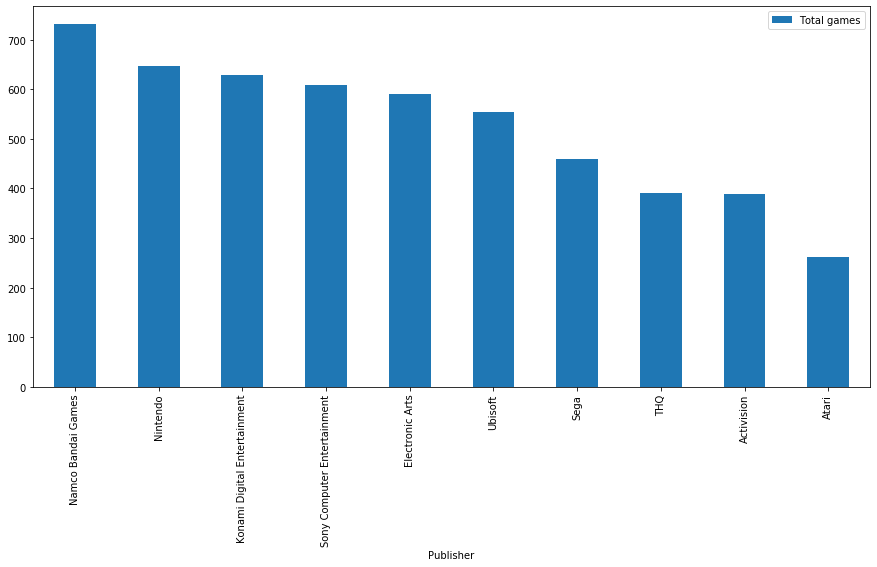

In [93]:
#now move to publishers
#the top 10 publishers based on how much games they had released
total_games_publishers.head(10).plot.bar(figsize=(15,7), x='Publisher', y='Name')
plt.savefig('Total_publisher_games.png', bbox_inches = 'tight')
plt.legend(['Total games'])
plt.show()

Namco bandai released more games than other publishers, followed by Nintendo and Konami

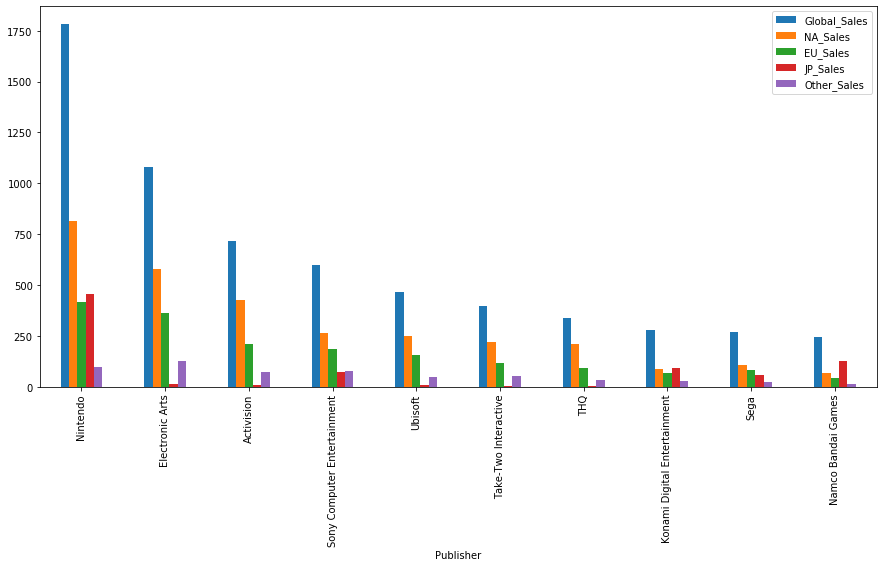

In [95]:
#now just because some publishers released more games, that doesnt mean they have better sales
#lets see per publishers total sales
sales_publisher.head(10).plot.bar(figsize=(15,7), x='Publisher')
plt.savefig('sales_publishers.png', bbox_inches = 'tight')
#plt.legend(['Total games'])
plt.show()